In [1]:
# Using Beautiful Soup for web scraping demographic information
from bs4 import BeautifulSoup

In [2]:
# Get Indian demographic information of WI from Zipatlas
import pandas as pd
import requests
url = "http://zipatlas.com/us/wi/city-comparison/percentage-indian-population.htm"
response = requests.get(url)
#soup = BeautifulSoup(response.text,'lxml')  
soup = BeautifulSoup(response.text,'html.parser')
data = []
table = soup.find('table', attrs = {"rules":"all"})
rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')     
    cols = [ele.text.strip(' \n') for ele in cols if ele != None]     
    data.append([ele for ele in cols if ele]) 
# convert into dataframe with specified columns
new_table = pd.DataFrame(data)
new_table = pd.DataFrame(data, columns = ['serial.no','Location','City Report','Population','%Indians','National Rank'])

new_table.drop(['serial.no','City Report','National Rank'], axis = 1,inplace=True)
new_table.drop(new_table.index[0],inplace=True)
#new_table.head(25)
relevant_table = new_table.head(25)
relevant_table # Indian population in Wisconsin in descending order

,Location,Population,%Indians
1,"Brookfield, Wisconsin (2)","41,829",1.46 %
2,"Mequon, Wisconsin (1)","4,752",1.15 %
3,"Oak Creek, Wisconsin (1)","28,659",0.95 %
4,"Thiensville, Wisconsin (1)","20,765",0.91 %
5,"Middleton, Wisconsin (1)","19,417",0.87 %
6,"Houlton, Wisconsin (1)","1,421",0.84 %
7,"Germantown, Wisconsin (1)","17,507",0.83 %
8,"New Berlin, Wisconsin (2)","38,258",0.81 %
9,"Madison, Wisconsin (12)","249,307",0.79 %
10,"Arena, Wisconsin (1)","1,763",0.73 %


In [3]:
# Install needed libraries
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           

In [4]:
# trial run to find locatipn of the largest Indian population in Wisconsin
address = 'Brookfield, Wisconsin'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


43.0605671 -88.1064787


In [5]:
# get the lats and lons for the top 25 Indian populated cities in Wisconsin
lat_array = []
lon_array = []
for row in relevant_table['Location']:
    address = row
    #print(address)
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print(latitude, longitude)    
    lat_array.append(float(latitude))
    lon_array.append(float(longitude))
relevant_table['Latitude'] = lat_array
relevant_table['Longitude'] = lon_array
relevant_table.head(21)
relevant_table.dtypes

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWi

Location       object
Population     object
%Indians       object
Latitude      float64
Longitude     float64
dtype: object

In [6]:
# Interested locations are those locations that have large Indian population and calculating distance from Franklin, WI
# Franklin, WI is where I reside.
from geopy.distance import geodesic
tempDataList = relevant_table[['Latitude','Longitude']]
tempDataList.columns = ['lat', 'lon']
temp_list = tempDataList.values.tolist()
#print(temp_list)
#v = {'lat': 42.888627, 'lon': -88.038420}
franklin_loc = [42.888627,-88.038420]
dist = []
for row in temp_list:
    #print(row, franklin_loc,geodesic(row, franklin_loc).miles)
    dist.append(geodesic(row, franklin_loc).miles)
#print(dist)

relevant_table['Distance from Franklin City(Miles)'] = dist
relevant_table.sort_values('Distance from Franklin City(Miles)')
# get top 10 locations close to Franklin within 25 miles radius
interested_locs =relevant_table.sort_values('Distance from Franklin City(Miles)').head(14)
interested_locs # locations that are closest to Franklin, WI in ascending order


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Location,Population,%Indians,Latitude,Longitude,Distance from Franklin City(Miles)
12,"Franklin, Wisconsin (1)","29,369",0.67 %,42.888627,-88.038420,0.000025
23,"Greendale, Wisconsin (1)","14,163",0.40 %,42.940571,-87.995919,4.184111
8,"New Berlin, Wisconsin (2)","38,258",0.81 %,42.976453,-88.109039,7.041663
3,"Oak Creek, Wisconsin (1)","28,659",0.95 %,42.885850,-87.863136,8.899427
20,"Elm Grove, Wisconsin (1)","6,369",0.47 %,43.043068,-88.078978,10.857426
18,"Franksville, Wisconsin (1)","6,286",0.50 %,42.760019,-87.913413,10.915825
16,"Ridgeway, Wisconsin (1)","1,117",0.62 %,43.045451,-88.085312,11.083397
21,"Milwaukee, Wisconsin (29)","821,015",0.45 %,43.034993,-87.922497,11.688563
1,"Brookfield, Wisconsin (2)","41,829",1.46 %,43.060567,-88.106479,12.360123
11,"Waukesha, Wisconsin (3)","88,592",0.67 %,43.011678,-88.231481,12.961099


In [7]:
# Find Indian restaurants in these interested locations
CLIENT_ID = '31WRJ2FPTMYSPSYGZAGCJJNBEHMSZGYD4GLFCZLQPGAVGV2B' # your Foursquare ID
CLIENT_SECRET = '2XMROW2GEGHP1N4WKDAO0OY5A4VBLZOO30WDCF4TV0IV0P4R' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 31WRJ2FPTMYSPSYGZAGCJJNBEHMSZGYD4GLFCZLQPGAVGV2B
CLIENT_SECRET:2XMROW2GEGHP1N4WKDAO0OY5A4VBLZOO30WDCF4TV0IV0P4R


In [8]:
# define search as "Indian" since that resulted in maximum results. 
# All other queries gave poor results.
search_query = 'Indian'
radius = 50000
print(search_query + ' .... OK!')


Indian .... OK!


In [9]:
# pick only Indian Restaurants from the venue categories
def get_Venues(url):
    # get results from Foursquare data
    results = requests.get(url).json()
   
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)   
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    #print(dataframe_filtered)
    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories'] 
        except:
            categories_list = row['venue.categories']
    
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    #dataframe_filtered.shape
    #dataframe_filtered
    
    new_data = dataframe_filtered.loc[dataframe_filtered['categories'].isin(['Indian','Indian Restaurant','Indian Food','Food Restaurant', \
                                                                             'Diner','Multicuisine Indian Restaurant','Indian Sweet Shop',\
                                                                             'North Indian Restaurant','Restaurant', 'Food', 'Food & Spices']) ]
    return new_data
    #return dataframe_filtered

tempDataList = interested_locs[['Latitude','Longitude']]
temp_list = tempDataList.values.tolist()    
df = pd.DataFrame([])   
for row in temp_list:
    #print(row[0], row[1])
    latitude = row[0]
    longitude= row[1]  
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    
       
    data = pd.DataFrame(get_Venues(url))
    df = df.append(data)
    
df.drop_duplicates(subset='name', keep='first', inplace=True)
df # list of all Indian restaurants without duplicates.
   


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
2,Indian Buffet,Indian Restaurant,7107 S 76th St,US,Franklin,United States,Rawson,3811,"[7107 S 76th St (Rawson), Franklin, WI 53132, ...","[{'label': 'display', 'lat': 42.91553798989341...",42.915538,-88.009517,53132,WI,534b288b498ead4f0c6d7c71
5,Indian Village Restaurant,Indian Restaurant,NaN,US,Greenfield,United States,NaN,8697,"[Greenfield, WI, United States]","[{'label': 'display', 'lat': 42.96381062701573...",42.963811,-88.009392,NaN,WI,5584c75b498e71de96bd12cc
8,Indian Bazaar,Indian Restaurant,5254 S 27th St,US,Milwaukee,United States,NaN,10046,"[5254 S 27th St, Milwaukee, WI 53221, United S...","[{'label': 'display', 'lat': 42.95070878928324...",42.950709,-87.948978,53221,WI,4bcdeaed937ca5937391ad92
9,Indian Delight,Indian Restaurant,NaN,US,Oak Creek,United States,NaN,10564,"[Oak Creek, WI 53154, United States]","[{'label': 'display', 'lat': 42.901466, 'lng':...",42.901466,-87.910070,53154,WI,5a161d14c824ae54c368d8e8
11,Indian Groceries & Spices,Indian Restaurant,10633 W North Ave,US,Wauwatosa,United States,NaN,19061,"[10633 W North Ave, Wauwatosa, WI 53226, Unite...","[{'label': 'display', 'lat': 43.05976794648545...",43.059768,-88.045935,53226,WI,4bc9f0e2937ca59353a9a692
15,Indian Palace Restaurant,Food,11302 W Bluemound Rd,US,Milwaukee,United States,NaN,16438,"[11302 W Bluemound Rd, Milwaukee, WI 53226, Un...","[{'label': 'display', 'lat': 43.035792, 'lng':...",43.035792,-88.055046,53226,WI,4f44acc519836ed00195bca0
19,Bollywood Grill-Fine Indian Cuisine,Indian Restaurant,1038 N Jackson St,US,Milwaukee,United States,NaN,20598,"[1038 N Jackson St, Milwaukee, WI 53202, Unite...","[{'label': 'display', 'lat': 43.0462638, 'lng'...",43.046264,-87.905989,53202,WI,5261dcf0498e0b002b8dc288
25,India Garden,Indian Restaurant,2930 N 117th St,US,Wauwatosa,United States,NaN,20502,"[2930 N 117th St, Wauwatosa, WI 53222, United ...","[{'label': 'display', 'lat': 43.07219139431711...",43.072191,-88.059022,53222,WI,5495d8a3498ecb80c5e0d00c
28,Saffron Indian Bistro,Indian Restaurant,17395 W Bluemound Rd,US,Brookfield,United States,NaN,18032,"[17395 W Bluemound Rd, Brookfield, WI 53045, U...","[{'label': 'display', 'lat': 43.036173, 'lng':...",43.036173,-88.129786,53045,WI,4f3240bc19836c91c7c54b86
28,Durbar Indian Restaurant,Restaurant,NaN,US,Milwaukee,United States,NaN,13994,"[Milwaukee, WI 53202, United States]","[{'label': 'display', 'lat': 43.044167, 'lng':...",43.044167,-87.898540,53202,WI,57eaf961cd1090927db6f91e


In [10]:
df['name'].unique() # list of all unique Indian restaurants in our interested locations.

array(['Indian Buffet', 'Indian Village Restaurant', 'Indian Bazaar',
       'Indian Delight', 'Indian Groceries & Spices',
       'Indian Palace Restaurant', 'Bollywood Grill-Fine Indian Cuisine',
       'India Garden', 'Saffron Indian Bistro',
       'Durbar Indian Restaurant', "Vishnu's South Indian Restaurant",
       'Taste of India', 'K2 Indian Pakistani Cuisine', 'Indian House',
       'Mantra Indian Bistro'], dtype=object)

In [29]:
# plot these locations on the map with reference to the city of Franklin, WI
latitude, longitude = [42.888627,-88.038420]
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Franklin',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Indian restaurants as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map.save('map1.html')

venues_map

In [12]:
# find no of Indian restaurants in each of these interested cities.
df['city'].value_counts()
result = pd.DataFrame([])
result = pd.DataFrame(df['city'].value_counts())
result.reset_index(inplace = True)
result.columns = ['Location','No of Indian Restaurants']
result

,Location,No of Indian Restaurants
0,Milwaukee,5
1,Brookfield,3
2,Wauwatosa,2
3,Greenfield,1
4,Oconomowoc,1
5,Franklin,1
6,Oak Creek,1


In [13]:
# Merge 
data = pd.DataFrame(interested_locs['Location'])
data['No of Indian Restaurants'] = 0

data.loc[data.Location == 'Franklin, Wisconsin (1)', 'No of Indian Restaurants'] = 1
data.loc[data.Location == 'Oak Creek, Wisconsin (1)', 'No of Indian Restaurants'] = 1
data.loc[data.Location == 'Brookfield, Wisconsin (2)', 'No of Indian Restaurants'] = 3
data.loc[data.Location == 'Milwaukee, Wisconsin (29)', 'No of Indian Restaurants'] = 7
data.loc[data.Location == 'Wauwatosa, Wisconsin (1)', 'No of Indian Restaurants'] = 2
data.loc[data.Location == 'Oconomowoc, Wisconsin (1)', 'No of Indian Restaurants'] = 1
data.loc[data.Location == 'Greenfield, Wisconsin (1)', 'No of Indian Restaurants'] = 1
data.reset_index(inplace = True)
data.columns = ['Ranking based on Indian Population','Location','No of Indian Restaurants']
data.sort_values(['Ranking based on Indian Population'], ascending=True, inplace = True)

frank_prox = data.sort_index(axis = 0)
cluster_df = pd.merge(frank_prox, interested_locs, on='Location')
cluster_df
cluster_df.drop(['Location','%Indians','Population'],axis = 1, inplace = True)
cluster_df

,Ranking based on Indian Population,No of Indian Restaurants,Latitude,Longitude,Distance from Franklin City(Miles)
0,12,1,42.888627,-88.038420,0.000025
1,23,0,42.940571,-87.995919,4.184111
2,8,0,42.976453,-88.109039,7.041663
3,3,1,42.885850,-87.863136,8.899427
4,20,0,43.043068,-88.078978,10.857426
5,18,0,42.760019,-87.913413,10.915825
6,16,0,43.045451,-88.085312,11.083397
7,21,7,43.034993,-87.922497,11.688563
8,1,3,43.060567,-88.106479,12.360123
9,11,0,43.011678,-88.231481,12.961099


In [14]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [15]:
from scipy import stats
cols = ['Ranking based on Indian Population','No of Indian Restaurants','Latitude','Longitude','Distance from Franklin City(Miles)']
df_std = stats.zscore(cluster_df[cols])
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(df_std)
labels = kmeans.labels_
cluster_df['clusters']=labels
cols.extend(['clusters'])
print(cluster_df[cols].groupby(['clusters']).mean())
#print(cluster_df[cols].groupby['Distance from Franklin City(Miles)'].mean())

          Ranking based on Indian Population  No of Indian Restaurants  \
clusters                                                                 
0                                  14.000000                       0.5   
1                                   4.333333                       0.0   
2                                  12.500000                       0.5   
3                                  21.000000                       7.0   

           Latitude  Longitude  Distance from Franklin City(Miles)  
clusters                                                            
0         42.868767 -87.952722                            5.999847  
1         43.229344 -88.023789                           23.734766  
2         43.036297 -88.145416                           11.951893  
3         43.034993 -87.922497                           11.688563  


Text(25.8237,0.5,'No of Indian Restaurants')

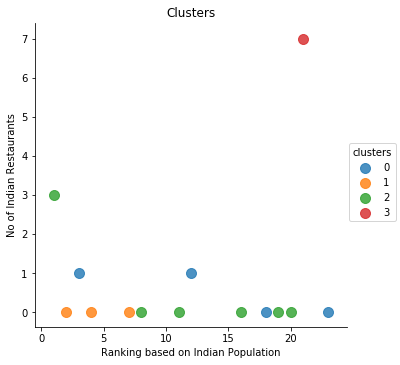

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('Ranking based on Indian Population','No of Indian Restaurants',\
          data = cluster_df,\
          fit_reg = False,\
          hue = "clusters",\
          scatter_kws = {"marker":"D","s":100})
plt.title('Clusters')
plt.xlabel('Ranking based on Indian Population')
plt.ylabel('No of Indian Restaurants')

Text(26.6627,0.5,'Distance from Franklin City(Miles)')

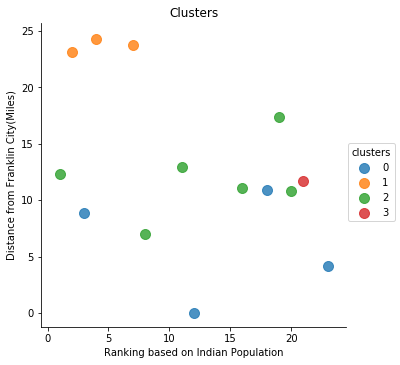

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('Ranking based on Indian Population','Distance from Franklin City(Miles)',\
          data = cluster_df,\
          fit_reg = False,\
          hue = "clusters",\
          scatter_kws = {"marker":"D","s":100})
plt.title('Clusters')
plt.xlabel('Ranking based on Indian Population')
plt.ylabel('Distance from Franklin City(Miles)')

In [56]:
latitude, longitude = [ 43.036297 ,-88.145416 ]
color = ['red','blue','green','yellow']
popup = ['Restaurant Location(1)', 'Restaurant Location(2)', 'Restaurant Location(3)', 'Restaurant Location(4)' ]
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel
def get_map(latitude, longitude, color, popup):
    # add a red circle marker to represent the Conrad Hotel
        folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        color= color,
        popup= folium.Popup(popup,parse_html = True),
        fill = True,
        fill_color = color,
        fill_opacity = 0.6,  
        icon=folium.Icon(icon=popup), 
        
        #legend_name = 'Top 4 Locations for Indian Restaurant')
        ).add_to(venues_map)

latitude = [ 43.229344, 43.036297, 42.868767, 43.034993]
longitude = [ -88.023789, -88.145416, -87.952722, -87.922497 ]
for x, y, z, v in zip(latitude, longitude, color, popup):

    get_map(x, y, z, v)
venues_map

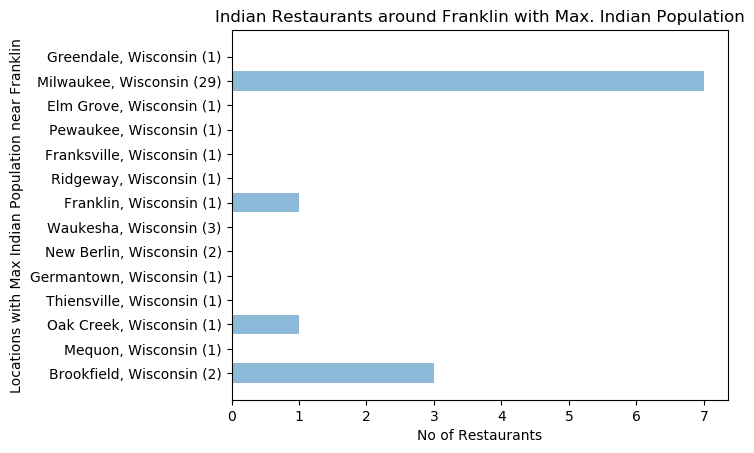

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(data['Location']))
 
plt.barh(data['Location'],data['No of Indian Restaurants'],align='center', alpha=0.5)
plt.yticks(y_pos, data['Location'])
plt.xlabel('No of Restaurants')
plt.ylabel('Locations with Max Indian Population near Franklin')
plt.title('Indian Restaurants around Franklin with Max. Indian Population')
 
plt.show()

In [21]:
venue_ids = df['id']
venue_ids # get venue ids of all Indian restaurants to calculate average user rating

2     534b288b498ead4f0c6d7c71
5     5584c75b498e71de96bd12cc
8     4bcdeaed937ca5937391ad92
9     5a161d14c824ae54c368d8e8
11    4bc9f0e2937ca59353a9a692
15    4f44acc519836ed00195bca0
19    5261dcf0498e0b002b8dc288
25    5495d8a3498ecb80c5e0d00c
28    4f3240bc19836c91c7c54b86
28    57eaf961cd1090927db6f91e
15    5bd11398446ea6002cc1ed64
19    4b61da97f964a5202c272ae3
14    54d93bcd498ed6e364b51f42
14    4f5ae36de4b068aa4de4ca83
25    50cd1f2de4b0461757b82eff
Name: id, dtype: object

In [22]:
#average rating for Indian restuarants in each location
rating = 0
for row in venue_ids:
    venue_id = row   
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result['response']['venue'].keys())
    result['response']['venue']
    try:
        print(result['response']['venue']['rating'])
        rating = rating +(float(result['response']['venue']['rating']))
    except:
        print('This venue has not been rated yet.')
rating

7.9
This venue has not been rated yet.
7.3
This venue has not been rated yet.
7.7
This venue has not been rated yet.
6.8
7.3
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
7.7
This venue has not been rated yet.
This venue has not been rated yet.
8.6


53.300000000000004

In [23]:
mean_rating = rating/7
mean_rating # avg rating for Indian restaurants in/around Milwaukee

7.614285714285715